In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster import hierarchy

SEED = np.random.seed(42)

## Lab 4: Clustering
Assignment 1

(a) Generate 4 Gaussian clusters in two dimensional space given by two numeric
variables in range [-10, +10]. The Gaussian distributions of the clusters must have
different means and the same standard deviation, initially set to 0.6. The total
number of instances for all the four clusters is 300.


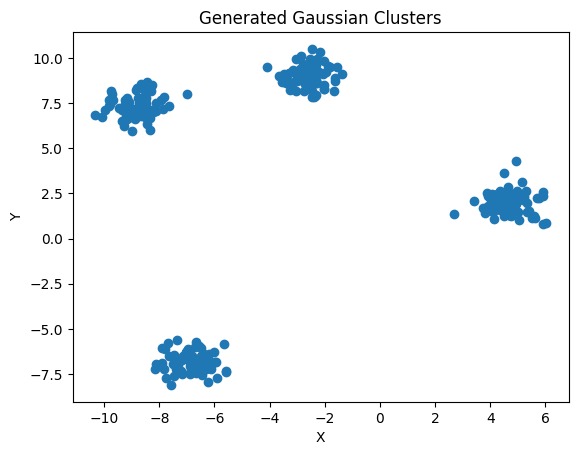

In [ ]:
num_instances = 300  # Total number of instances for all clusters
num_clusters = 4    # Number of clusters
std_dev = 0.6       # Standard deviation for all clusters

# Generate random means for each cluster in the range [-10, 10]
cluster_means = np.random.uniform(-10, 10, (num_clusters, 2))

data = []

for i in range(num_clusters):
    # Generate data for each cluster
    cluster_data = np.random.normal(loc=cluster_means[i], scale=std_dev, size=(num_instances // num_clusters, 2))
    data.append(cluster_data)

# Combine data from all clusters
data = np.vstack(data)

plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Gaussian Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


(b) Run k-means clustering algorithm on the data obtained in (a) and visualize the
clusters and their centers for k in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}.
Hint: use function KMeans from sklearn.cluster. Set parameter random_state
to None.

Print the contingency tables of the clustering solutions.
Hint: use function contingency_matrix from sklearn.metrics.cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

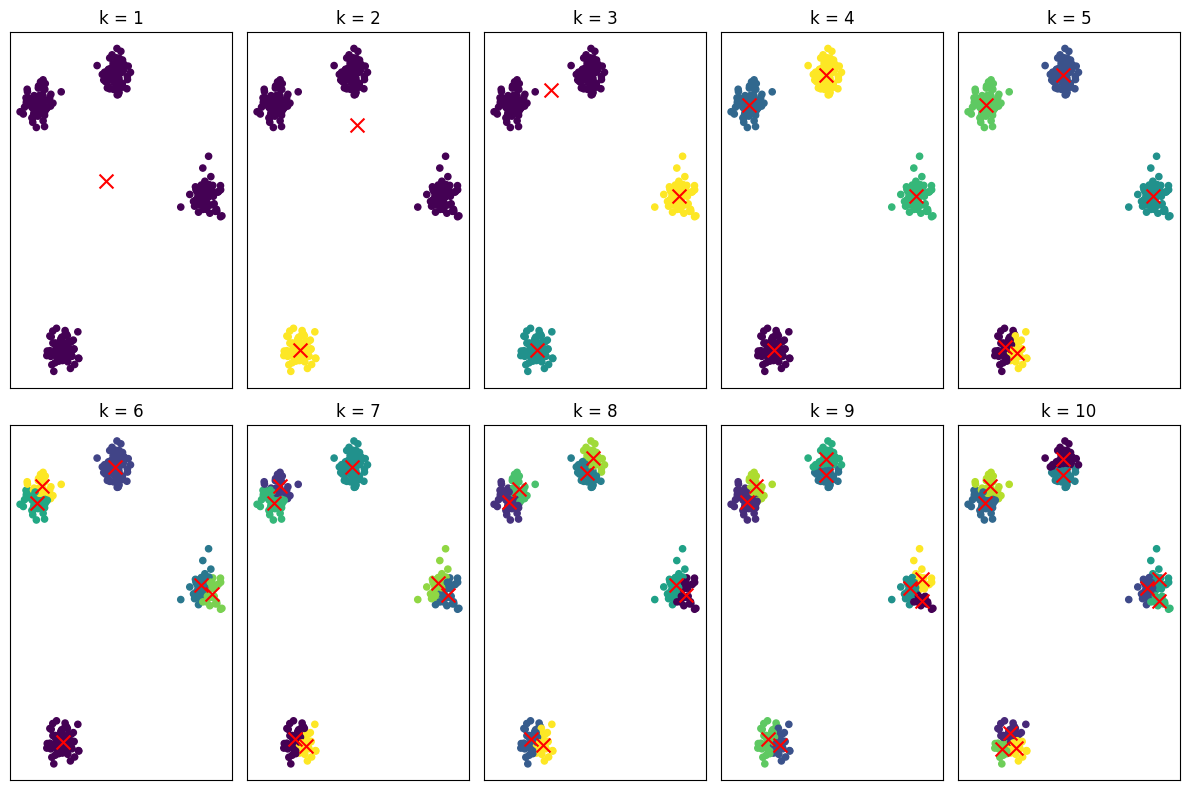

In [ ]:
# Values of k to try
k_values = range(1, 11)

# Initialize lists to store the cluster centers and contingency tables for each k
cluster_centers = []
contingency_tables = []

plt.figure(figsize=(12, 8))
# Iterate through each value of k and calculate clusters + visualization
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=None)
    kmeans.fit(data)
    cluster_centers.append(kmeans.cluster_centers_)

    # Calculate the contingency table
    contingency = contingency_matrix(kmeans.labels_, kmeans.labels_)
    contingency_tables.append(contingency)

    # Visualize the clusters and their centers for each k
    plt.subplot(2, 5, i + 1)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=20)
    plt.scatter(cluster_centers[i][:, 0], cluster_centers[i][:, 1], c='red', marker='x', s=100, label='Centers')
    plt.title(f'k = {k}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
# Print the contingency tables
for i, k in enumerate(k_values):
    print(f"Contingency Table for k = {k}:\n{contingency_tables[i]}\n")

Contingency Table for k = 1:
[[300]]

Contingency Table for k = 2:
[[225   0]
 [  0  75]]

Contingency Table for k = 3:
[[150   0   0]
 [  0  75   0]
 [  0   0  75]]

Contingency Table for k = 4:
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]

Contingency Table for k = 5:
[[38  0  0  0  0]
 [ 0 75  0  0  0]
 [ 0  0 75  0  0]
 [ 0  0  0 75  0]
 [ 0  0  0  0 37]]

Contingency Table for k = 6:
[[75  0  0  0  0  0]
 [ 0 75  0  0  0  0]
 [ 0  0 45  0  0  0]
 [ 0  0  0 51  0  0]
 [ 0  0  0  0 30  0]
 [ 0  0  0  0  0 24]]

Contingency Table for k = 7:
[[39  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0]
 [ 0  0 33  0  0  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  0 52  0  0]
 [ 0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0 36]]

Contingency Table for k = 8:
[[30  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 37]]

Contingency Table 

(c) Plot the sum of square errors (SSE) for k in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}. Does the plot
indicate that the natural number of clusters is 4?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

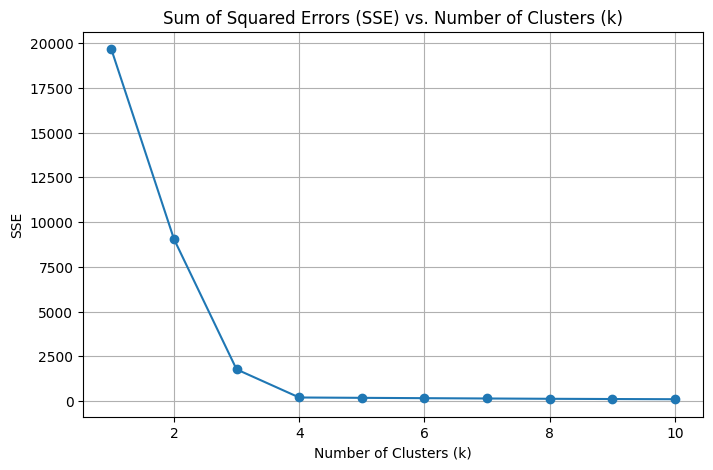

In [ ]:
# Initialize a list to store SSE values
sse = []

# Iterate through each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=None)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plot the SSE values
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Sum of Squared Errors (SSE) vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.grid(True)

plt.show()

(d) Repeat (a)-(c) when you generate the clusters with the standard deviation of 0.1
and 2.5. Do the SSE plots indicate that the natural number of clusters is 4?

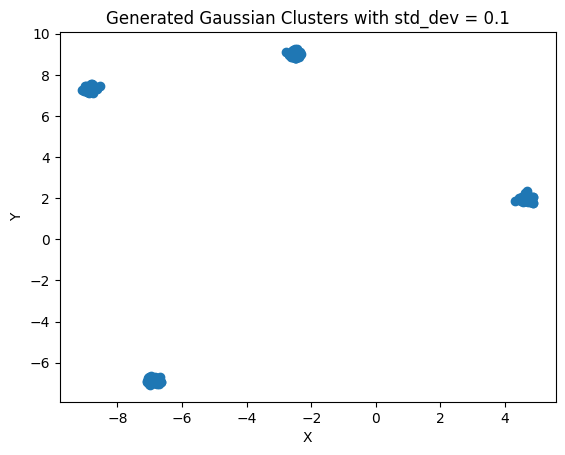

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

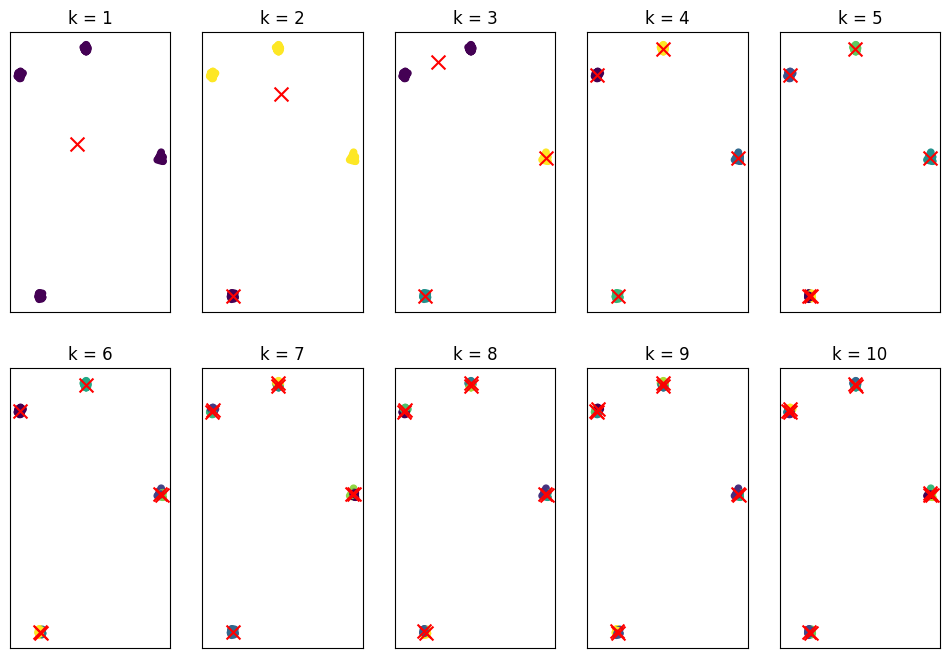

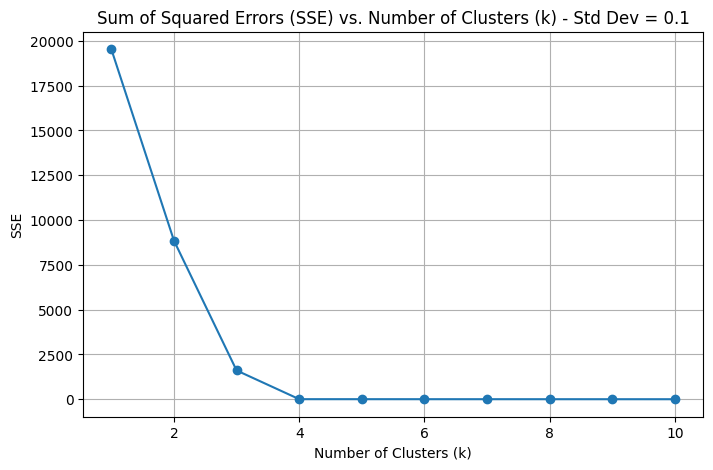

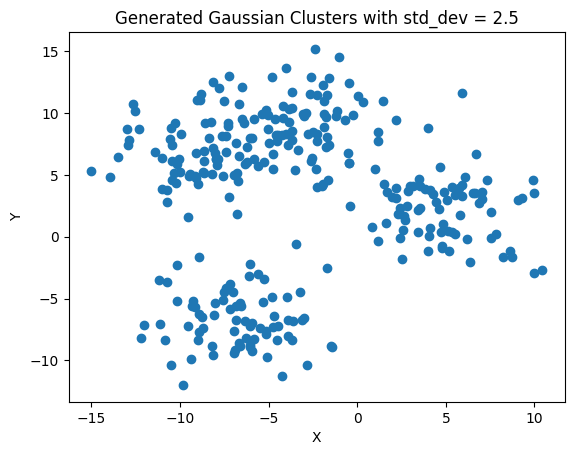

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

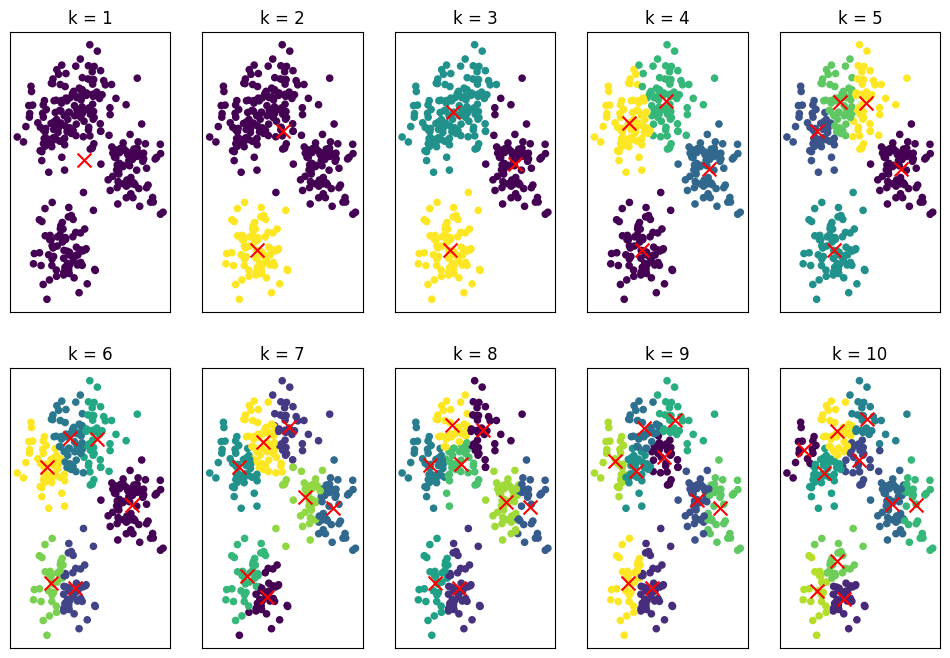

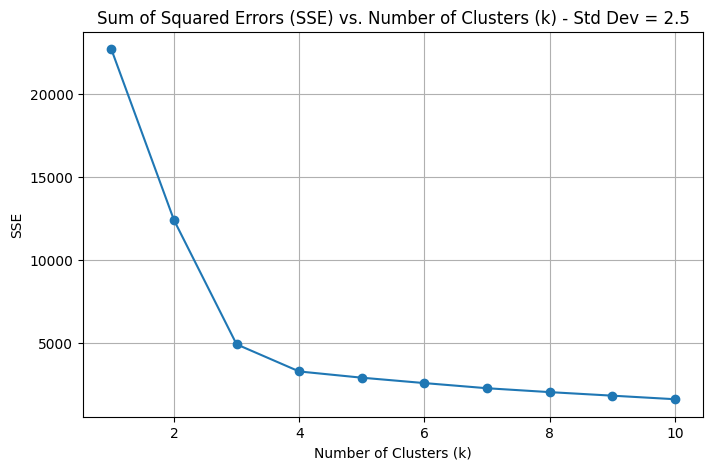

In [ ]:
# Function to generate clusters and analyze for a given std_dev
def generate_and_analyze_clusters(std_dev, random_state=None):
    # define random state to generate the same data every time
    r_seed = np.random.RandomState(42)
    # Generate data with the specified standard deviation
    num_instances = 300  # Total number of instances for all clusters
    num_clusters = 4    # Number of clusters

    # Generate random means for each cluster in the range [-10, 10]
    cluster_means = r_seed.uniform(-10, 10, (num_clusters, 2))

    data = []

    for i in range(num_clusters):
        # Generate data for each cluster
        cluster_data = r_seed.normal(loc=cluster_means[i], scale=std_dev, size=(num_instances // num_clusters, 2))
        data.append(cluster_data)

    data = np.vstack(data)

    plt.scatter(data[:, 0], data[:, 1])
    plt.title(f'Generated Gaussian Clusters with std_dev = {std_dev}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    # Values of k to try
    k_values = range(1, 11)

    # Initialize lists to store SSE values
    sse = []
    cluster_centers = []
    contingency_tables = []

    plt.figure(figsize=(12, 8))

    # Iterate through each value of k
    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        cluster_centers.append(kmeans.cluster_centers_)

        contingency = contingency_matrix(kmeans.labels_, kmeans.labels_)
        contingency_tables.append(contingency)

        # Visualize the clusters and their centers for each k
        plt.subplot(2, 5, i + 1)
        plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=20)
        plt.scatter(cluster_centers[i][:, 0], cluster_centers[i][:, 1], c='red', marker='x', s=100, label='Centers')
        plt.title(f'k = {k}')
        plt.xticks([])
        plt.yticks([])

    # Plot the SSE values
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, sse, marker='o')
    plt.title(f'Sum of Squared Errors (SSE) vs. Number of Clusters (k) - Std Dev = {std_dev}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE')
    plt.grid(True)

    plt.show()

    return data, cluster_centers

# Generate and analyze clusters for std_dev = 0.1
data_01, cluster_centers_01 = generate_and_analyze_clusters(0.1)

# Generate and analyze clusters for std_dev = 2.5
data_25, cluster_centers_25 = generate_and_analyze_clusters(2.5)

(e) Repeat (d) with another cluster-center initialization by setting the parameter
random_state of KMeans to an integer number.
- Do you receive clustering solutions similar to those obtained for
random_state=None? Can you explain why?
- Can you propose an extension of the k-means initialization that is less
dependent on random_state; i.e. it results in similar clustering solutions?

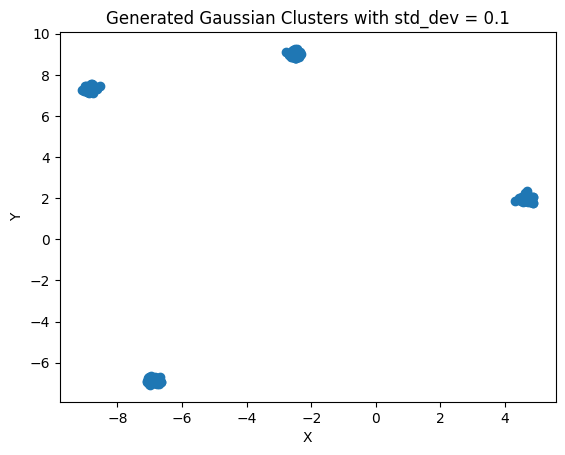

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

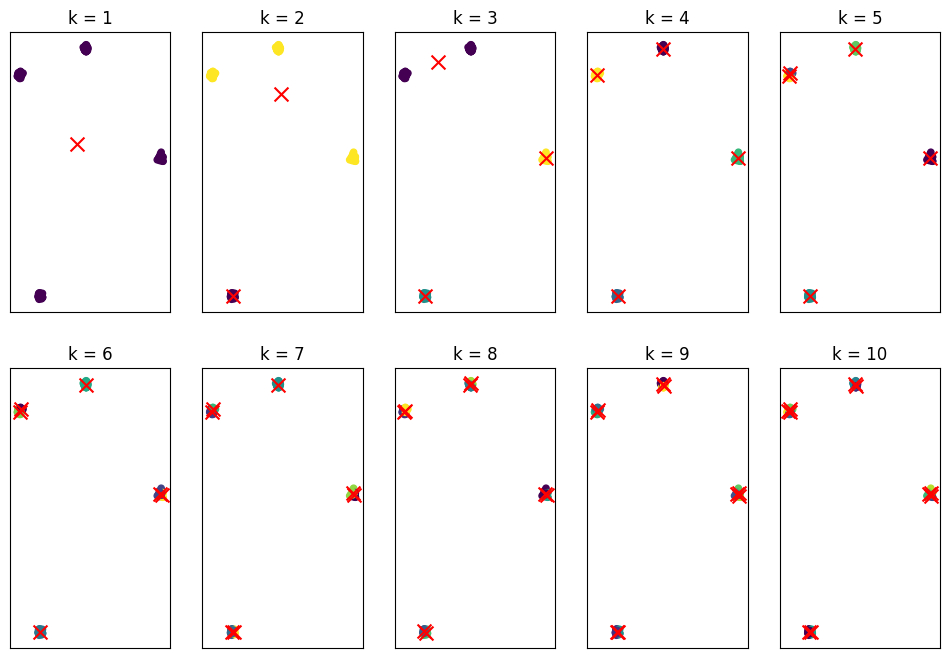

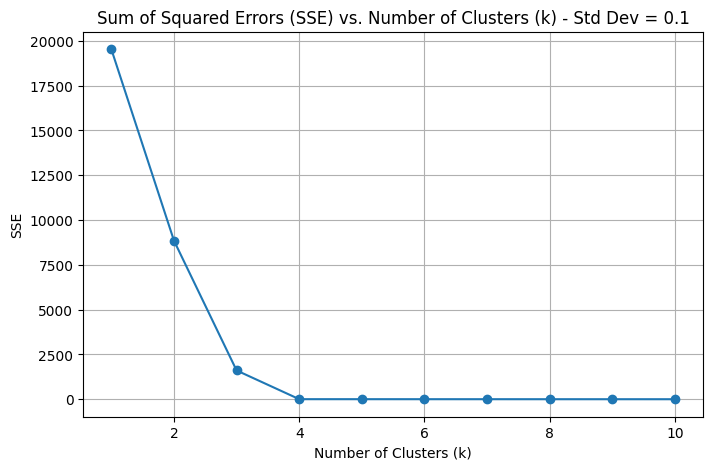

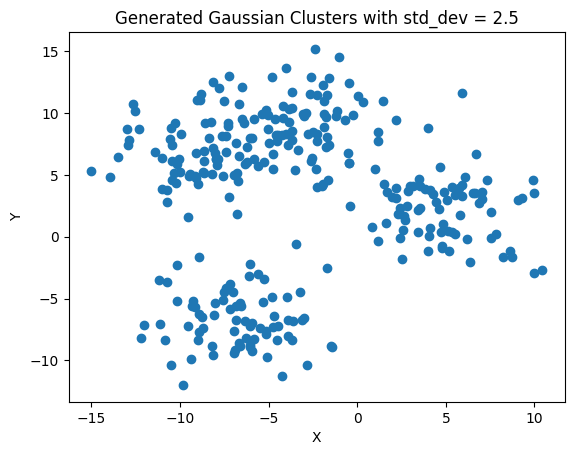

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

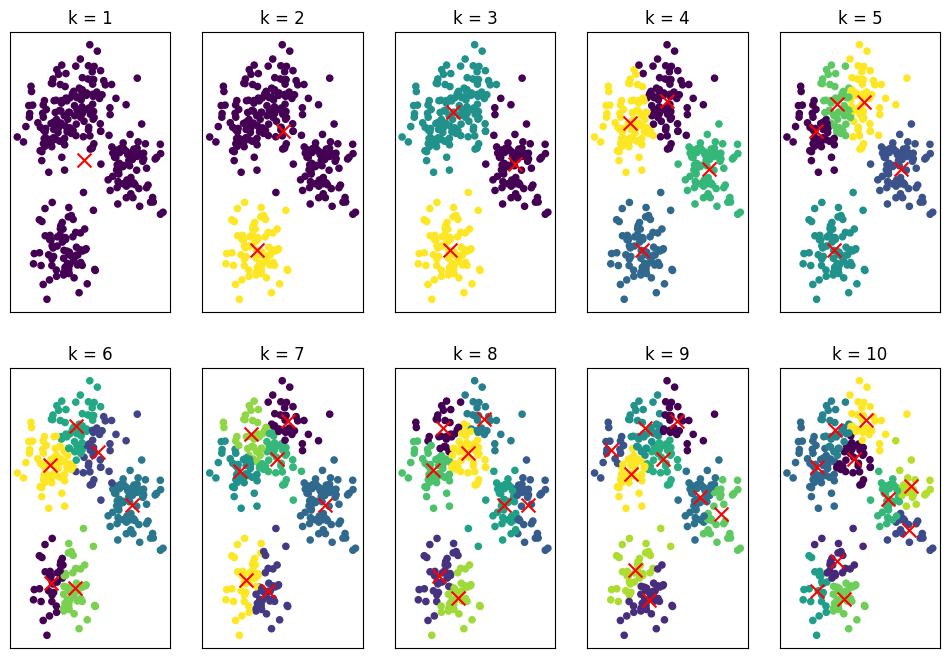

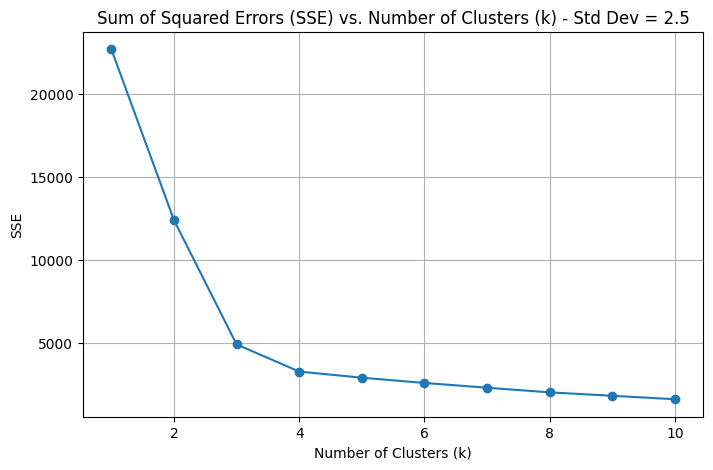

In [ ]:
# e)
# Generate and analyze clusters for std_dev = 0.1
data_01, cluster_centers_01 = generate_and_analyze_clusters(0.1, random_state=SEED)

# Generate and analyze clusters for std_dev = 2.5
data_25, cluster_centers_25 = generate_and_analyze_clusters(2.5, random_state=SEED)

## Assignment 2
(a) Load and print the vertebrate.csv data.

In [ ]:
# load data
path = '/content/vertebrate.csv'

data = pd.read_csv(path)
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


(b) Run single-link, max-link and average-link hierarchical clustering on this data.
Visualize the hierarchies. Choose the hierarchy that in your view is most natural
given the data and explain why.
Hint: To run hierarchical clustering use function hierarchy.linkage from
scipy.cluster. To visualize hierarchy.dendrogram from scipy.cluster.

In [ ]:
# Trim dataset down to only contain the numerical columns
data_trimmed = data.iloc[:,1:7]
data_trimmed

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [ ]:
list(data['Name'])

['human',
 'python',
 'salmon',
 'whale',
 'frog',
 'komodo',
 'bat',
 'pigeon',
 'cat',
 'leopard shark',
 'turtle',
 'penguin',
 'porcupine',
 'eel',
 'salamander']

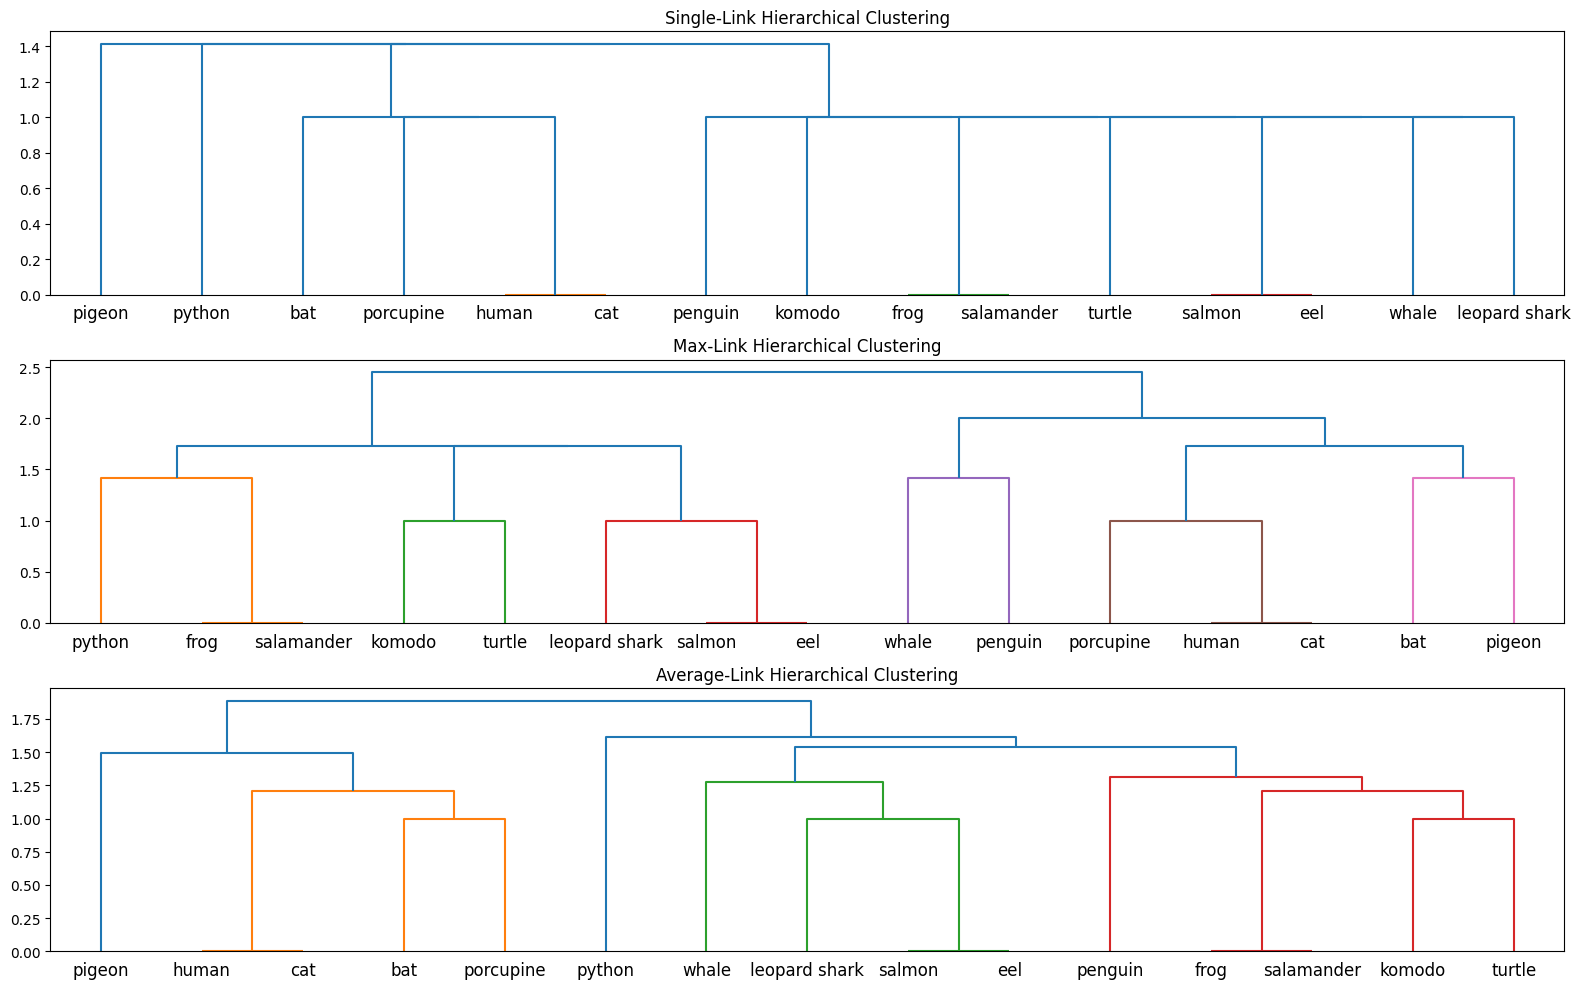

In [ ]:
# Perform hierarchical clustering using single-link, max-link, and average-link methods
single_linkage = hierarchy.linkage(data.iloc[:,1:7], method='single')
max_linkage = hierarchy.linkage(data.iloc[:,1:7], method='complete')
average_linkage = hierarchy.linkage(data.iloc[:,1:7], method='average')

# Visualize the hierarchies using dendrogram
plt.figure(figsize=(16, 10))

# Single-link hierarchical clustering
plt.subplot(3, 1, 1)
dendrogram = hierarchy.dendrogram(single_linkage, labels=list(data['Name']), orientation='top')
plt.title('Single-Link Hierarchical Clustering')

# Max-link hierarchical clustering
plt.subplot(3, 1, 2)
dendrogram = hierarchy.dendrogram(max_linkage, labels=list(data['Name']), orientation='top')
plt.title('Max-Link Hierarchical Clustering')

# Average-link hierarchical clustering
plt.subplot(3, 1, 3)
dendrogram = hierarchy.dendrogram(average_linkage, labels=list(data['Name']), orientation='top')
plt.title('Average-Link Hierarchical Clustering')

plt.tight_layout()
plt.show()


## Assignment 3

(a) Load and visualize the chameleon.csv data.

In [ ]:
# load data
path2 = '/content/chameleon.csv'
data = pd.read_csv(path2)

print(data)

# Split the data into X and Y coordinates
x = data.iloc[:, 0:1]
y = data.iloc[:, 1:2]



            x        y
0     650.914  214.888
1      41.767  179.408
2     509.126  233.749
3     486.403  152.427
4      46.883  367.904
...       ...      ...
1966  631.430  210.478
1967  187.652  247.923
1968  124.996  264.847
1969  522.511  302.785
1970  350.695  269.386

[1971 rows x 2 columns]


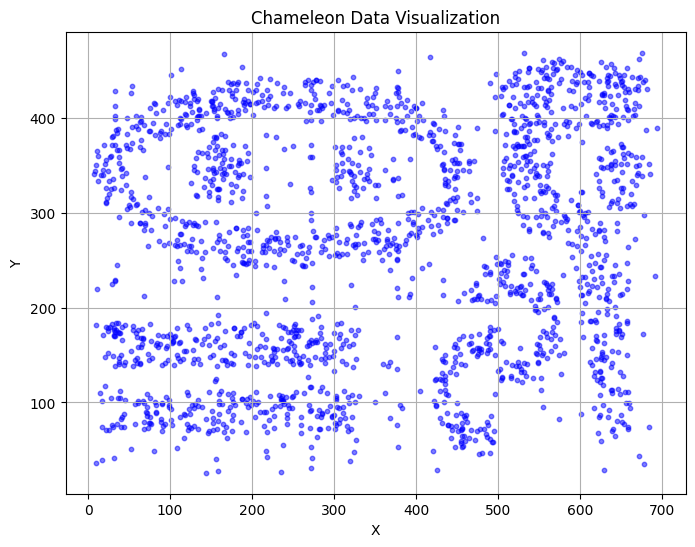

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, c='b', marker='o', alpha=0.5)
plt.title('Chameleon Data Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

(b) Run the DBSCAN method on this data for eps=15.5 and min_samples=5. Vizualize
the clustering solutions.
Hint: To run the DBSCAN method hierarchical clustering use function DBSCAN
from sklearn.cluster.

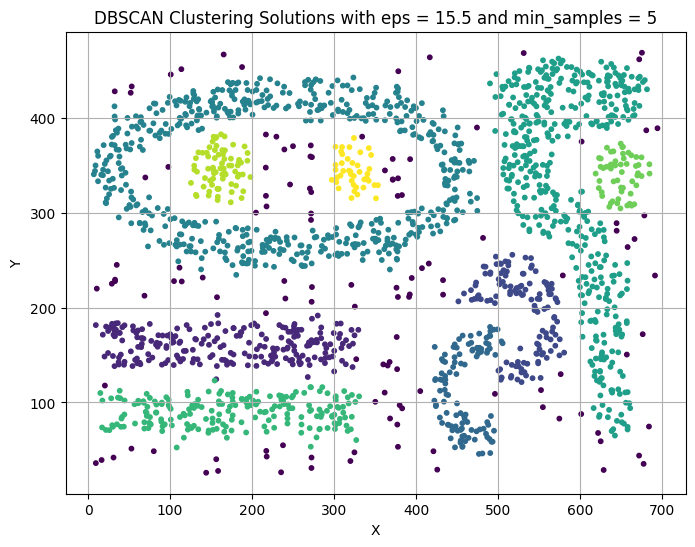

In [ ]:
# Specify DBSCAN parameters
eps = 15.5
min_samples = 5

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
labels = dbscan.fit_predict(data)

# Visualize the clustering solutions
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=labels, cmap='viridis', s=10)
plt.title(f'DBSCAN Clustering Solutions with eps = {eps} and min_samples = {min_samples}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

(c) Experiment with the DBSCAN method for eps in [1, 21] with step 5 and
min_samples in [1, 21] with step 5. Comment on the clusters for different settings.

EPS-Values: [ 1  6 11 16 21]
 Minimal numbers of samples in EPS-Cluster: [ 1  6 11 16 21]


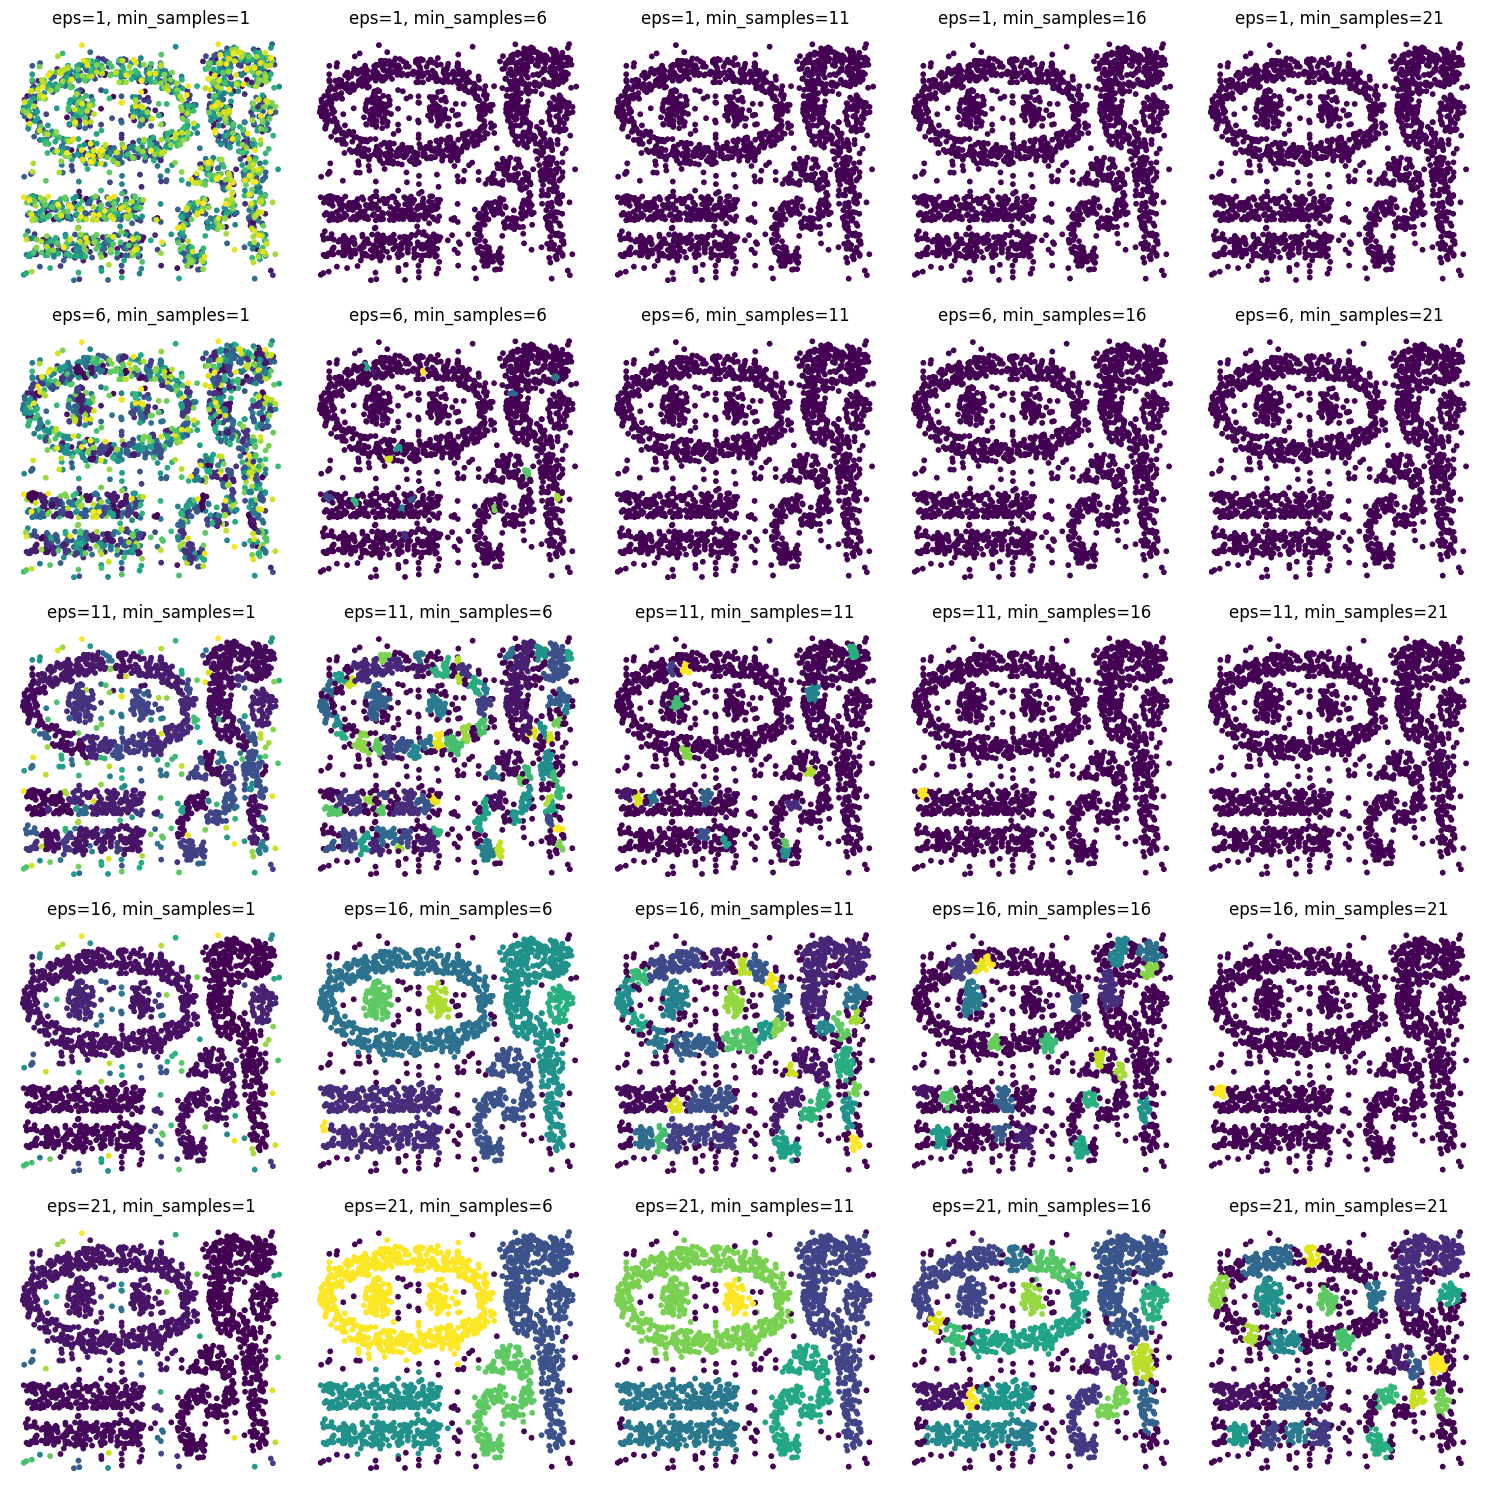

In [ ]:
# Define the range of values for eps and min_samples [1,21] with step 5 each
eps_values = np.arange(1, 22, 5)
min_samples_values = np.arange(1, 22, 5)

print(f"EPS-Values: {eps_values}\n Minimal numbers of samples in EPS-Cluster: {min_samples_values}")

# Create subplots for different parameter settings
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Initialize and fit the DBSCAN model for the current parameter settings
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        labels = dbscan.fit_predict(data)

        # Visualize the clustering solutions
        axes[i, j].scatter(x, y, c=labels, cmap='viridis', s=10)
        axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()